First of all we would like to have a look at some general information regarding the Hobbyist respondents. Specifically:
- What is the baseline percentage of resondents who code as a hobby
- Are any of Age, Gender or Location determining factors in whether people code as a hobby or not

Then we'll look at:
- Has it actually changed over time?
- Aside from the obvious benefit of learning are there any practical benefits in salary or job satisfaction

Lets import the necessary libraries and the data first

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

df = pd.read_csv('./survey_results/2020/survey_results_public.csv')
schema = pd.read_csv('./survey_results/2020/survey_results_schema.csv')
df.dropna(subset=['Hobbyist'], inplace=True)
# Create a new column which maps Hobbyist to numerical values, so that aggregate statistics become easier
df['HobbyistNum'] = df['Hobbyist'].replace(to_replace={'Yes': 1, 'No': 0})
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,HobbyistNum
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,1
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,0
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,1
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4,1
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8,1


In [20]:
hobbyist_df = df[df['Hobbyist'] == 'Yes']
not_hobbyist_df = df[df['Hobbyist'] == 'No']
hobbyists = hobbyist_df.shape[0]
not_hobbyists = not_hobbyist_df.shape[0]
baseline = "{:.2f}".format(hobbyists/(hobbyists + not_hobbyists))
print(f'There are {hobbyists} hobbyist developers, and {not_hobbyists} who are not. This gives a baseline proportion of {baseline}')

There are 50388 hobbyist developers, and 14028 who are not. This gives a baseline proportion of 0.78


From our baseline statistic we can see that 78% of respondents do code as hobby, which is a pretty high proportion!

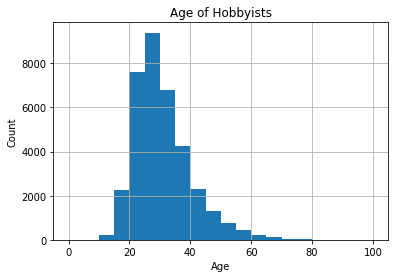

In [21]:
hobbyist_df['Age'].hist(bins=list(range(0,101,5)))
plt.title('Age of Hobbyists')
plt.xlabel('Age')
plt.ylabel('Count');

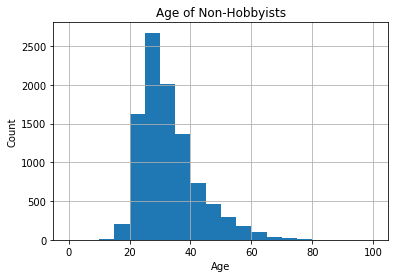

In [22]:
not_hobbyist_df['Age'].hist(bins=list(range(0,101,5)))
plt.title('Age of Non-Hobbyists')
plt.xlabel('Age')
plt.ylabel('Count');

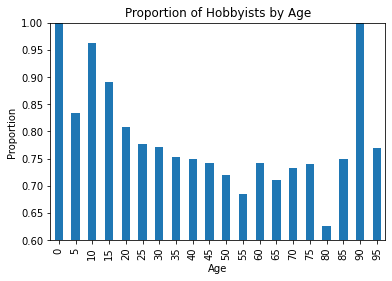

In [23]:
df['Age_bin'], bins = pd.cut(df['Age'], bins=list(range(0,101,5)), retbins=True)
age_agg_df = df[['Age_bin', 'HobbyistNum']].groupby('Age_bin').mean()
age_agg_df.index.categories = bins[:-1]
age_agg_df.plot.bar(legend=None, ylim=(0.6,1))
plt.title('Proportion of Hobbyists by Age')
plt.xlabel('Age')
plt.ylabel('Proportion');

To confirm that age isn't a determining factor, and that findings weren't hidden by the y-axis scale caused by the comparatively large peak of younger age groups, the chart above is the proportion of individuals who code a hobby in each 5 year age group bin. There is a slight decreasing trend as people get older, however it is quite clear that the bars remain fairly consistent in height, hovering around our baseline 78%, which supports our earlier conclusion. 

In [24]:
hobbyist_gender_val_counts = hobbyist_df['Gender'].value_counts()
total_gender_val_counts = df['Gender'].value_counts()
men_prop = "{:.2f}".format(hobbyist_gender_val_counts['Man'] / total_gender_val_counts['Man'])
women_prop = "{:.2f}".format(hobbyist_gender_val_counts['Woman'] / total_gender_val_counts['Woman'])
print(f"The proportion of 'Men' who code as a hobby is {men_prop}")
print(f"The proportion of 'Women' who code as a hobby is {women_prop}")
total_other = np.sum(df[(df['Gender'] != 'Man') & (df['Gender'] != 'Woman')]['Gender'].value_counts())
other = np.sum(hobbyist_df[(hobbyist_df['Gender'] != 'Man') & (hobbyist_df['Gender'] != 'Woman')]['Gender'].value_counts())
other_prop = "{:.2f}".format(other / total_other)
print(f"The proportion of everyone else who codes as a hobby is {other_prop}")

The proportion of 'Men' who code as a hobby is 0.80
The proportion of 'Women' who code as a hobby is 0.61
The proportion of everyone else who codes as a hobby is 0.82


Here we see that approximately 4 in 5 Men, and the same for those who do not identify as "Man" or "Woman", code as a hobby. Comparatively, 3 in 5 Women code as a hobby. 

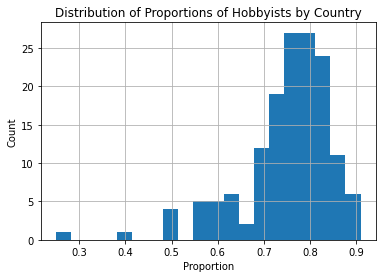

In [25]:
country_agg_df = df[['Country','HobbyistNum']].groupby('Country').mean()
country_agg_df[(country_agg_df['HobbyistNum'] < 0.98) & (country_agg_df['HobbyistNum'] > 0.02)].hist(bins=20)
plt.title('Distribution of Proportions of Hobbyists by Country')
plt.xlabel('Proportion')
plt.ylabel('Count');

Dividing the data up by Country, and ignoring extreme vales 0.0 and 1.0 as they are caused by very low numbers of respondents from those locations, we can see that again our distribution of proportions does not deviate much beyond +/- 10% in most cases around the mean. So it seems Country wouldn't a reliable indicator of whether someone codes as a hobby or not either.

In conclusion, both Age and Location appear to not be very useful in determining if someone codes as a hobby. A persons 'Gender' may be slightly more useful, but also not a great differentiator. 

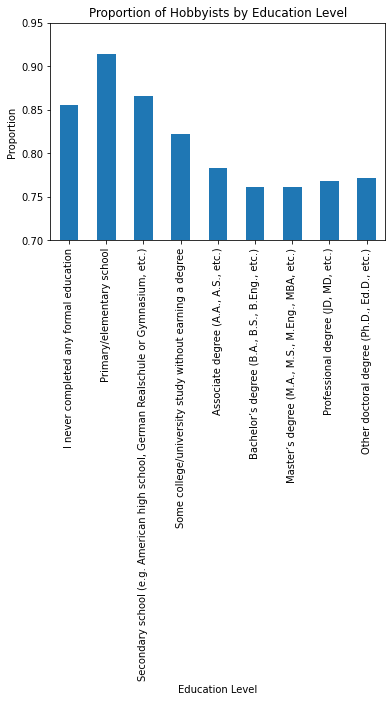

In [26]:
sort_order = [
    'I never completed any formal education',
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Some college/university study without earning a degree',
    'Associate degree (A.A., A.S., etc.)',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, etc.)',
    'Other doctoral degree (Ph.D., Ed.D., etc.)',
]
df[['EdLevel','HobbyistNum']].groupby('EdLevel').mean().reindex(sort_order).plot(legend=False, kind='bar', ylabel='Proportion', xlabel='Education Level', ylim=(0.7, 0.95), title='Proportion of Hobbyists by Education Level');

We can see above that overall the proportion of Hobbyists is reasonably high, with all groups coming in at over 75%. There is however a noticeable decrease in Hobbyists in those which have degree level education versus those that don't.

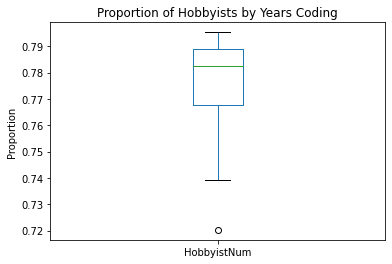

In [27]:
df = df.replace({'YearsCode':{'Less than 1 year': 0, 'More than 50 years': 51}})
df['YearsCode'] = df['YearsCode'].astype(float)
df['YearsCodeBin'], bins = pd.cut(df['YearsCode'], bins=list(range(0,56,5)), retbins=True)
years_code_df = df[['YearsCodeBin','HobbyistNum']].copy().groupby('YearsCodeBin').mean().sort_index()
years_code_df.index.categories = bins[:-1]
years_code_df.plot(kind='box')
plt.title('Proportion of Hobbyists by Years Coding')
plt.xlabel('')
plt.ylabel('Proportion');

We can see that the data has a very tight spread of only about 7%. This shows that being a hobbyist does seem to correlate with years of experience either.

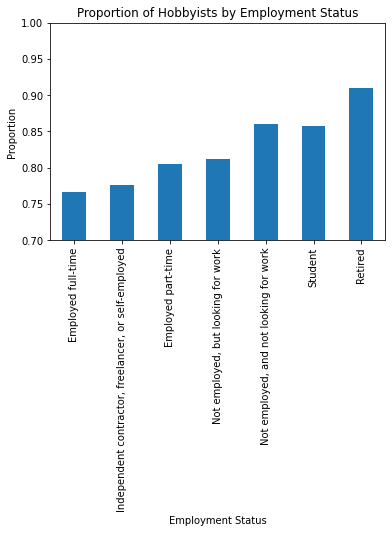

In [28]:
df[['Employment']].value_counts()
sort_order = [                                      
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed',
    'Employed part-time',
    'Not employed, but looking for work',
    'Not employed, and not looking for work',
    'Student',
    'Retired',
]
df[['Employment','HobbyistNum']].groupby('Employment').mean().reindex(sort_order).plot(kind='bar', legend=False, rot=90, ylim=(0.7,1.0), title='Proportion of Hobbyists by Employment Status', xlabel='Employment Status', ylabel='Proportion');

There is a very slight, but noticeable trend that as people become "less employed" they code as a hobby more

In [29]:
#Add a new field for Compensation bins so we can more easily plot results
df['ConvertedCompBin'], bins = pd.qcut(df['ConvertedComp'], q=20, retbins=True)

In [30]:
yes_df = df[df['Hobbyist'] == 'Yes']['ConvertedCompBin'].value_counts().sort_index()
no_df = df[df['Hobbyist'] == 'No']['ConvertedCompBin'].value_counts().sort_index()

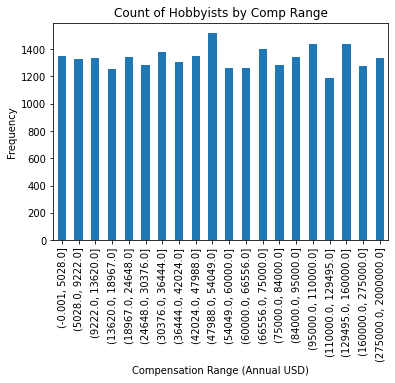

In [31]:
yes_df.plot(kind='bar', title='Count of Hobbyists by Comp Range', xlabel='Compensation Range (Annual USD)', ylabel='Frequency');

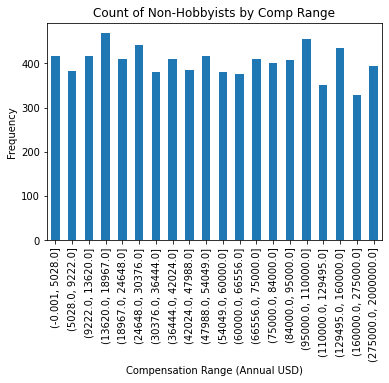

In [32]:
no_df.plot(kind='bar', title='Count of Non-Hobbyists by Comp Range', xlabel='Compensation Range (Annual USD)', ylabel='Frequency');

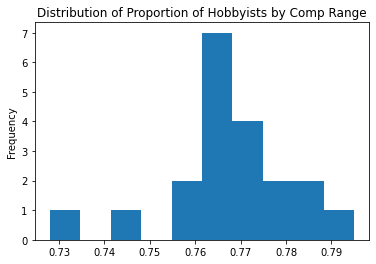

In [33]:
df[['ConvertedCompBin','HobbyistNum']].groupby('ConvertedCompBin').mean().plot(kind='hist', legend=False, title='Distribution of Proportion of Hobbyists by Comp Range', ylabel='Frequency');

Above we can see that again there there is little change in whether someone programs as a hobby or not as their salary increases.

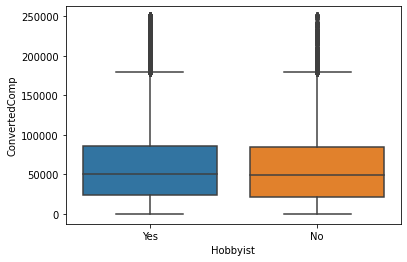

In [53]:
sns.boxplot(data=df[['Hobbyist','ConvertedComp']].dropna().drop(df[df['ConvertedComp'] > 250000].index), x='Hobbyist', y='ConvertedComp');

Turning that on its head we can see that Compensation statistics remain nearly identical for both groups

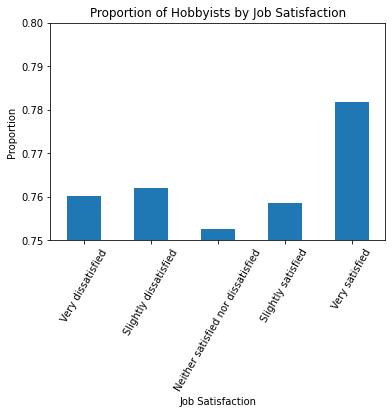

In [35]:
sort_order = [
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied',
]
df[['JobSat','HobbyistNum']].groupby('JobSat').mean().reindex(sort_order).plot(kind='bar', legend=False, rot=60, ylim=(0.75,0.8), title='Proportion of Hobbyists by Job Satisfaction', xlabel='Job Satisfaction', ylabel='Proportion');

Interestingly job satisfaction does not appear to be a good indicator either, suggesting that whilst people are disatisfied with their job they are not unhappy with programming as a whole.

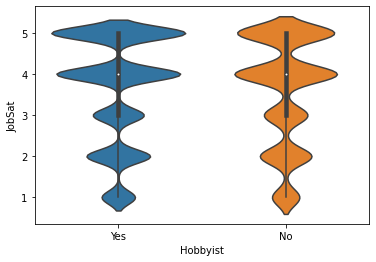

In [68]:
sns.violinplot(data=df[['JobSat','Hobbyist']].dropna().replace(to_replace={'Very dissatisfied': 1, 'Slightly dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3, 'Slightly satisfied': 4, 'Very satisfied': 5}), x='Hobbyist', y='JobSat');

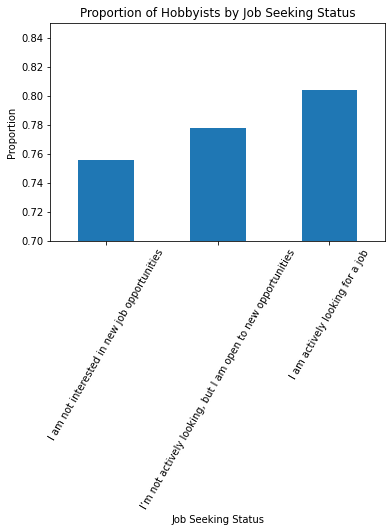

In [36]:
sort_order = [
    'I am not interested in new job opportunities',
    'I’m not actively looking, but I am open to new opportunities',
    'I am actively looking for a job',
]
df[['JobSeek','HobbyistNum']].groupby('JobSeek').mean().reindex(sort_order).plot(kind='bar', legend=False, rot=60, ylim=(0.7,0.85), title='Proportion of Hobbyists by Job Seeking Status', xlabel='Job Seeking Status', ylabel='Proportion');

Here we can see that while the proportions are largely the same for all 3 categories, there is an upward trend as people become more interested in a new job. This is possibly linked to people "grinding leetcode" or other such interview practice.